In [155]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import seaborn as sns
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [156]:
data = pd.read_table('../../../Experiment Report 2017_12_1.tsv')
data.head()

,assay,date,uuid
0,microRNA-seq,2017-05-30T21:43:03.153145+00:00,657f0463-868c-4c29-8899-062cdd7f51d5
1,ChIP-seq,2015-04-17T15:43:36.740623+00:00,9991b326-ea7a-49b0-a76e-b57634eadc29
2,ChIP-seq,2014-02-12T22:57:01.007300+00:00,10aa1ffa-2aa6-4611-95fe-480e3e4a9a7a
3,ChIP-seq,2015-04-17T15:43:40.687895+00:00,9bac340d-46c4-44bd-8cf8-00649162e478
4,RNA Bind-n-Seq,2014-11-25T04:04:08.548897+00:00,434e8772-eabb-48b4-8079-65b1b3a1cc14


In [157]:
top_three = data.assay.value_counts().keys()[:3]

In [158]:
data.date = data.date.apply(lambda x: pd.to_datetime(x))

In [159]:
data.dtypes

assay            object
date     datetime64[ns]
uuid             object
dtype: object

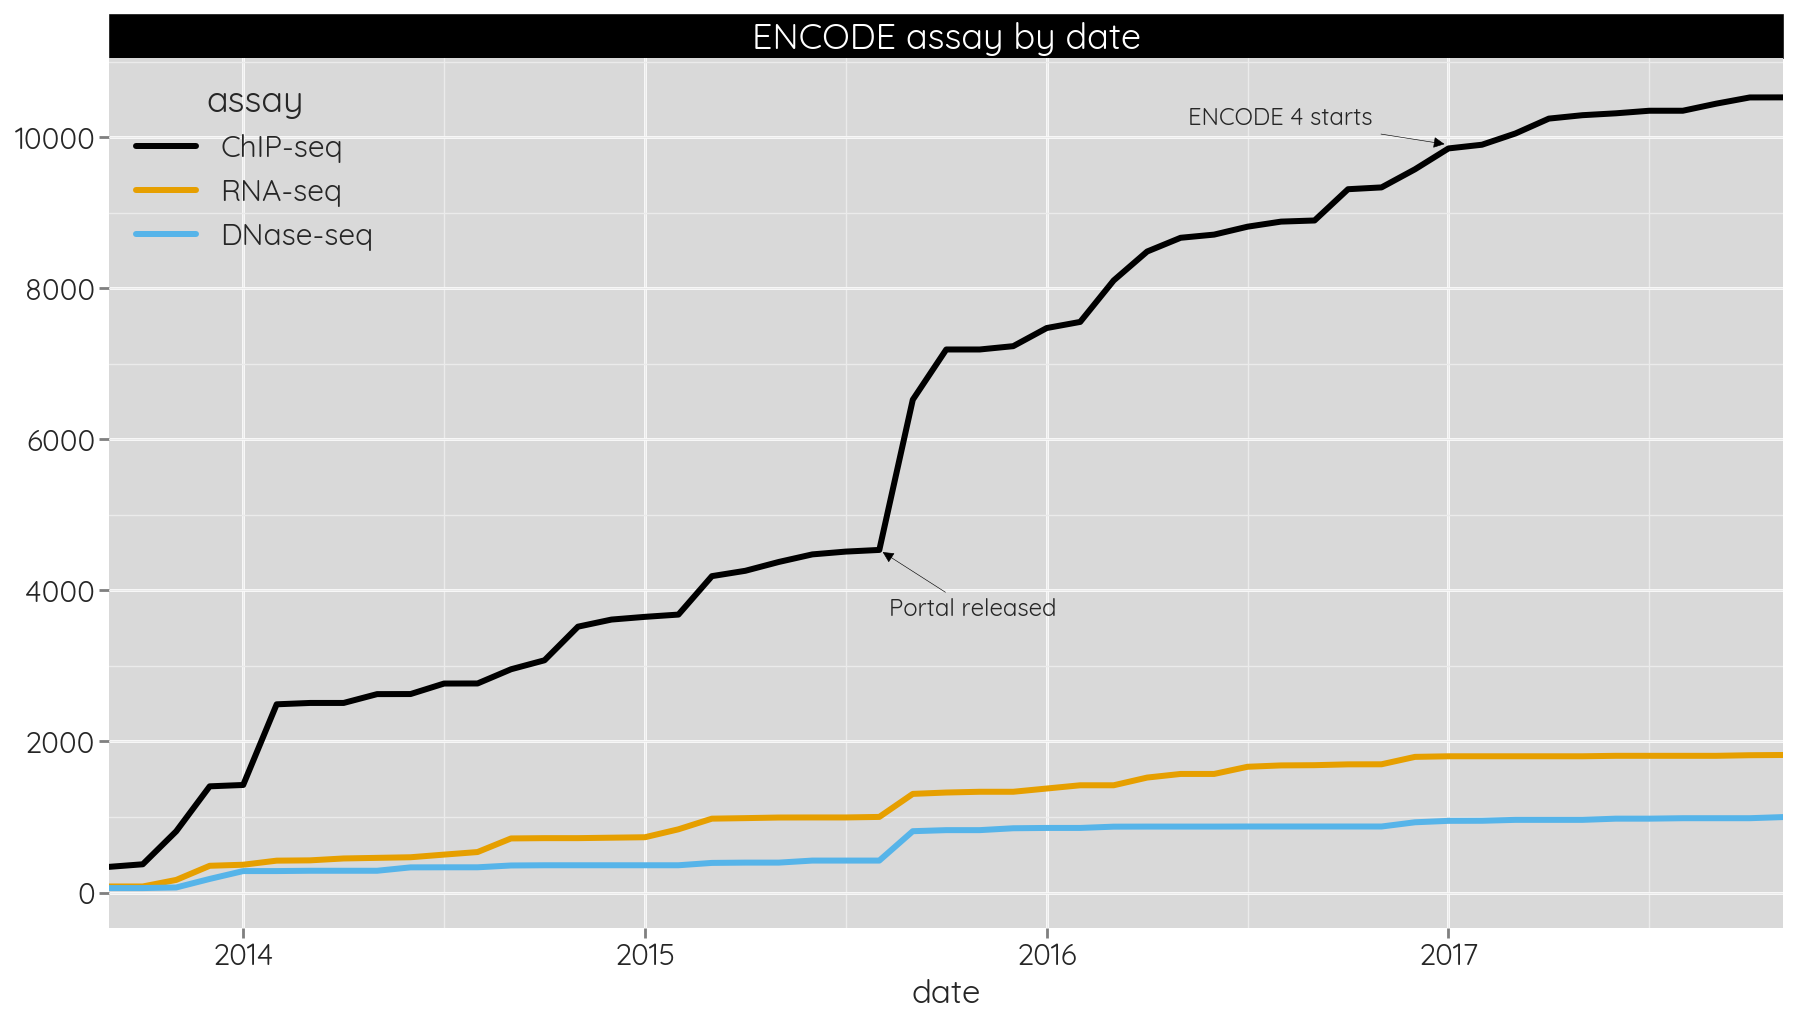

In [229]:
sns.set(style='darkgrid', font='Quicksand')
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(15, 8))
    (
        data.groupby(['assay', 'date'])
            .count()
            .unstack('assay')['uuid'][top_three]
            .resample('M').sum()
            .cumsum()
            .fillna(method='ffill')
            .plot(color=["#000000", "#E69F00",
                         "#56B4E9", "#009E73", 
                         "#F0E442", "#0072B2", 
                         "#D55E00", "#CC79A7"], lw=3, ax=ax)
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.05,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.002,
        'ENCODE assay by date',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Quicksand',
        size=18
    )
    ax.annotate(
        'ENCODE 4 starts',
        (pd.Timestamp('2017-01-31'), 9901),
        xytext=(-130, 10),
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', color='black'),
        family='Quicksand',
        size=12,
    )
    ax.annotate(
        'Portal released',
        (pd.Timestamp('2015-08-31'), 4536),
        xytext=(5, -30),
        va='center',
        ha='left',
        textcoords='offset points',
        arrowprops=dict(arrowstyle='-|>', color='black'),
        family='Quicksand',
        size=12
    )
    rstyle(ax)

In [76]:
# From http://messymind.net/making-matplotlib-look-like-ggplot/

from pylab import *

def rstyle(ax): 
    """Styles an axes to appear like ggplot2
    Must be called after all plot and axis manipulation operations have been carried out (needs to know final tick spacing)
    """
    #set the style of the major and minor grid lines, filled blocks
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=1.4)
    ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
    ax.patch.set_facecolor('0.85')
    ax.set_axisbelow(True)
    
    #set minor tick spacing to 1/2 of the major ticks
    ax.xaxis.set_minor_locator(MultipleLocator( (plt.xticks()[0][1]-plt.xticks()[0][0]) / 2.0 ))
    ax.yaxis.set_minor_locator(MultipleLocator( (plt.yticks()[0][1]-plt.yticks()[0][0]) / 2.0 ))
    
    #remove axis border
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_alpha(0)
       
    #restyle the tick lines
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(5)
        line.set_color("gray")
        line.set_markeredgewidth(1.4)
    
    #remove the minor tick lines    
    for line in ax.xaxis.get_ticklines(minor=True) + ax.yaxis.get_ticklines(minor=True):
        line.set_markersize(0)
    
    #only show bottom left ticks, pointing out of axis
    rcParams['xtick.direction'] = 'out'
    rcParams['ytick.direction'] = 'out'
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    
    if ax.legend_ is None:
        lg = ax.legend_
        lg.get_frame().set_linewidth(0)
        lg.get_frame().set_alpha(0.5)

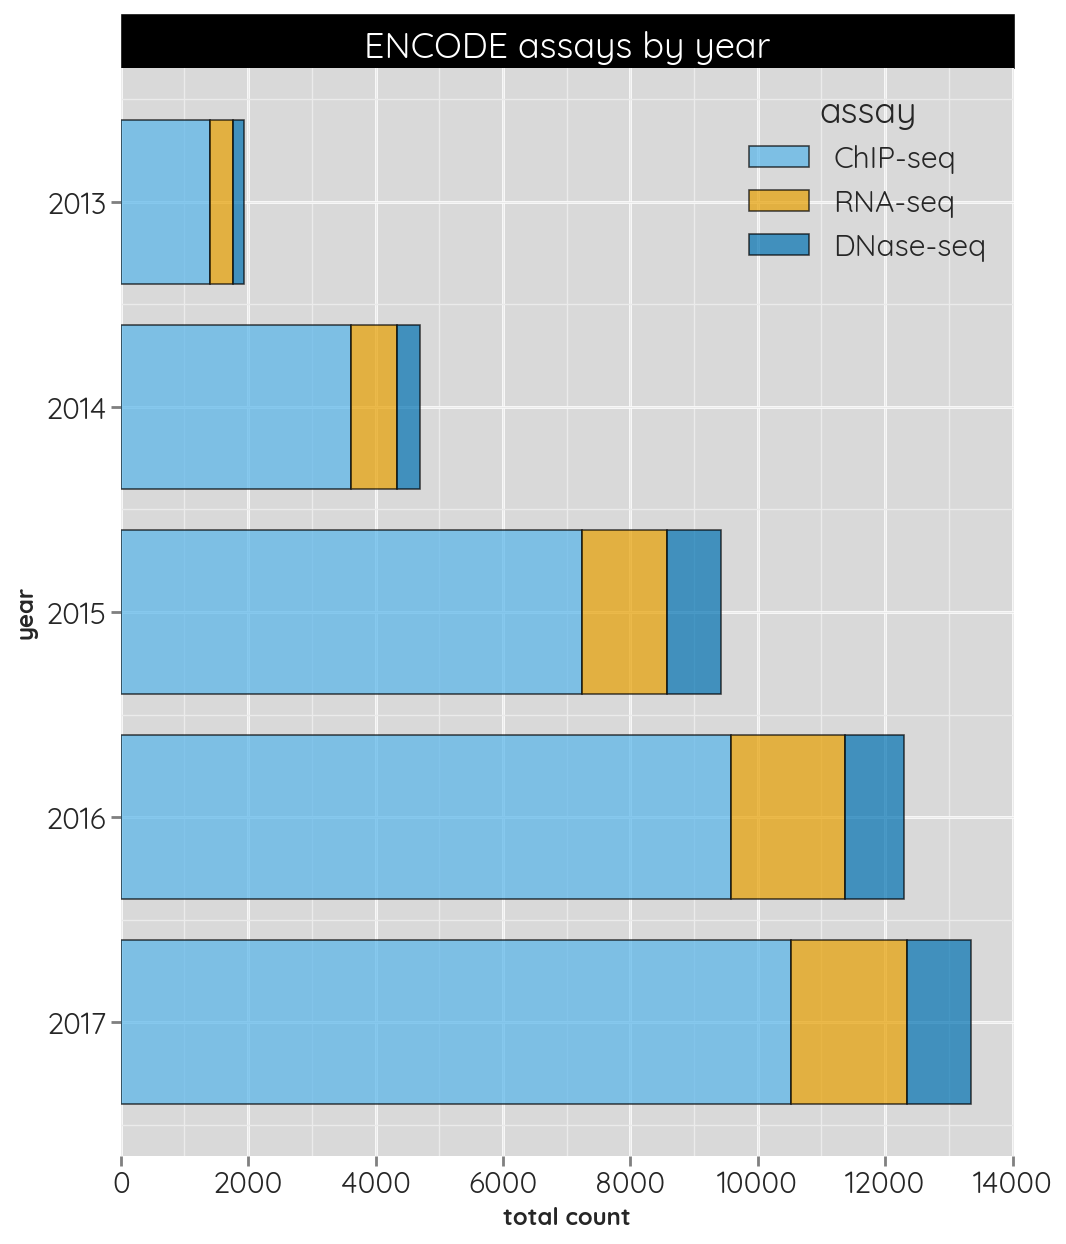

In [346]:
sns.set(font='Quicksand')
df = (data.groupby(['assay', 'date'])
                .count()
                .unstack('assay')['uuid'][top_three]
                .resample('A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        df.plot(
            color=["#56B4E9", "#E69F00", "#0072B2", 
                   "#D55E00", "#F0E442" ],
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.05,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'ENCODE assays by year',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Quicksand',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('year', weight='bold', size=12, family='Quicksand')
    ax.set_xlabel('total count', weight='bold', size=12, family='Quicksand')
    rstyle(ax)